In [1]:
# importing the required modules
import pandas as pd
import numpy as np

In [2]:
# loading the dataset
cancerdata=pd.read_csv("wcd.csv")
cancerdata

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
# renaming the column attributes and selecting the rows without ? as data
# converting the datatype from object to int
cancerdata.columns =[0, 1, 2, 3,4,5,6,7,8,9,10]
cancerdata = cancerdata[cancerdata[6] != "?"]
cancerdata[6]=cancerdata[6].astype(int)
cancerdata

/var/folders/wh/s9sjf6f12p90gkc70vdrlp240000gn/T/ipykernel_9480/3840711204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancerdata[6]=cancerdata[6].astype(int)


,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
#retreiving the info of the dataset
cancerdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       683 non-null    int64
 1   1       683 non-null    int64
 2   2       683 non-null    int64
 3   3       683 non-null    int64
 4   4       683 non-null    int64
 5   5       683 non-null    int64
 6   6       683 non-null    int64
 7   7       683 non-null    int64
 8   8       683 non-null    int64
 9   9       683 non-null    int64
 10  10      683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [5]:
# selecting the attributes without id of the datapoints and without the class label
features=[1,2,3,4,5,6,7,8,9]

In [6]:
#Generating a copy of the dataset so that we can work with class labels on the later stage
data=cancerdata[features].copy()
data

,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [7]:
#1data=(data-data.min())/(data.max()-data.min())*9+1

In [8]:
#describing the dataset
data.describe()

,1,2,3,4,5,6,7,8,9
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
#viewing the first 5 rows of the data
data.head()

,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [10]:
# Devoloping the k means algorithm from scratch
# Generating random centroids
def random_centroids(data,k):
    centroids=[]
    for i in range(k):
        centroid=data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)


In [11]:
centroids=random_centroids(data,9)
centroids

,0,1,2,3,4,5,6,7,8
1,3.0,4.0,7.0,5.0,2.0,3.0,3.0,8.0,4.0
2,2.0,2.0,1.0,1.0,6.0,1.0,1.0,2.0,1.0
3,1.0,5.0,1.0,2.0,4.0,1.0,2.0,4.0,7.0
4,1.0,1.0,1.0,10.0,3.0,6.0,1.0,2.0,8.0
5,10.0,2.0,2.0,2.0,5.0,2.0,5.0,1.0,3.0
6,10.0,3.0,1.0,1.0,1.0,4.0,1.0,10.0,10.0
7,1.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0
8,1.0,2.0,10.0,1.0,1.0,3.0,3.0,9.0,10.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
#distances = centroids.apply(lambda x: np.sqrt(((data-x)**2).sum(axis=1)))
#distances

In [13]:
# Calculating the distances between a centroid and a data point
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [14]:
labels = get_labels(centroids,data)
labels

1    7
2    9
3    9
4    8
5    1
6    9
7    9
8    9
9    9
dtype: int64

In [15]:
# Generating new centroids with iterations
def new_centroids(data,labels,k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [17]:
#Plotting the grapth of classification
def plot_clusters(data,labels,centroids,iteration):
    pca=PCA(n_components=2)
    data_2d=pca.fit_transform(data)
    centroids_2d=pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration{iteration}')
    plt.scatter(x=data_2d[:,0],y=data_2d[:,1],c=labels)
    #plt.scatter(np.arange(len(values)), values, c = colors/255)
    plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,1])
    plt.show()

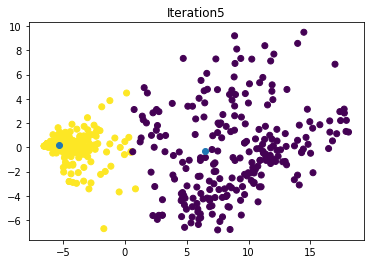

In [18]:
max_iterations=100
k=2
centroids=random_centroids(data,k)
old_centroids=pd.DataFrame()
iteration=1
while iteration<max_iterations and not centroids.equals(old_centroids):
    old_centroids=centroids
    labels=get_labels(data,centroids)
    centroids=new_centroids(data,labels,k)
    plot_clusters(data,labels,centroids,iteration)
    iteration +=1
    


In [19]:
centroids

,0,1
1,6.647433,2.427210
2,6.008920,1.152947
3,6.095022,1.219596
4,4.471095,1.184312
5,4.902340,1.955447
6,6.527095,1.151773
7,5.528179,1.825890
8,4.630307,1.107998
9,1.822040,1.030799


In [20]:
# Comparing the centroids of data with Kmeans algorithm using inbuilt function
from sklearn.cluster import KMeans
kmeans=KMeans(2)
kmeans.fit(data)
centroids=kmeans.cluster_centers_

In [21]:
# storing the centroids generated in a dataframe
pd.DataFrame(centroids,columns=features).T

,0,1
1,7.173913,3.055188
2,6.800000,1.298013
3,6.734783,1.428256
4,5.739130,1.353201
5,5.478261,2.094923
6,7.930435,1.317881
7,6.108696,2.092715
8,6.039130,1.260486
9,2.569565,1.112583


In [22]:
#Performing the kmeans from scratch with the class label

In [23]:
features1=[1,2,3,4,5,6,7,8,9,10]

In [24]:
data1=cancerdata[features1].copy()
data1

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [25]:
data1.describe()

,1,2,3,4,5,6,7,8,9,10
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [26]:
data1.head()

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [27]:
def random_centroids(data1,k):
    centroids=[]
    for i in range(k):
        centroid=data1.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

In [28]:
centroids=random_centroids(data,10)
centroids

,0,1,2,3,4,5,6,7,8,9
1,4.0,3.0,3.0,2.0,1.0,9.0,10.0,10.0,5.0,10.0
2,1.0,1.0,9.0,4.0,2.0,1.0,7.0,1.0,4.0,10.0
3,1.0,1.0,1.0,1.0,1.0,1.0,3.0,10.0,1.0,6.0
4,10.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,10.0
5,1.0,3.0,2.0,1.0,3.0,6.0,3.0,4.0,2.0,1.0
6,1.0,1.0,1.0,3.0,10.0,1.0,10.0,1.0,1.0,1.0
7,3.0,6.0,10.0,3.0,1.0,4.0,3.0,3.0,1.0,3.0
8,1.0,1.0,1.0,5.0,1.0,5.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0


In [29]:
def get_labels(data1, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data1 - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [30]:
labels = get_labels(centroids,data1)
labels

1     7
2    10
3    10
4    10
5    10
6    10
7     5
8     8
9     9
dtype: int64

In [31]:
def new_centroids(data1,labels,k):
    return data1.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [32]:
def plot_clusters(data1,labels,centroids,iteration):
    pca=PCA(n_components=2)
    data_2d=pca.fit_transform(data1)
    centroids_2d=pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration{iteration}')
    plt.scatter(x=data_2d[:,0],y=data_2d[:,1],c=labels)
    #plt.scatter(np.arange(len(values)), values, c = colors/255)
    plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,1])
    plt.show()

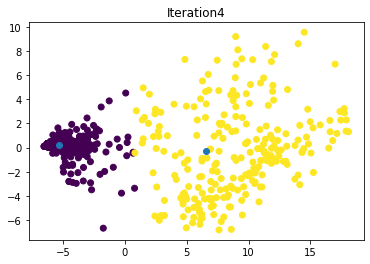

In [33]:
max_iterations=100
k=2
centroids=random_centroids(data1,k)
old_centroids=pd.DataFrame()
iteration=1
while iteration<max_iterations and not centroids.equals(old_centroids):
    old_centroids=centroids
    labels=get_labels(data1,centroids)
    centroids=new_centroids(data1,labels,k)
    plot_clusters(data1,labels,centroids,iteration)
    iteration +=1
    

In [34]:
centroids

,0,1
1,2.427210,6.647433
2,1.152947,6.008920
3,1.219596,6.095022
4,1.184312,4.471095
5,1.955447,4.902340
6,1.151773,6.527095
7,1.825890,5.528179
8,1.107998,4.630307
9,1.030799,1.822040
10,2.025307,3.875938


The algorithm without class label takes more number of iterations to reach the stable centroid state than the algorithm with class labels. The accuracy of the kmeans algorithm is 80%.
Chaning the centers helps in making the boundary more clear between two centroids.

In [35]:
from sklearn.cluster import KMeans
kmeans=KMeans(2)
kmeans.fit(data1)
centroids=kmeans.cluster_centers_

In [36]:
pd.DataFrame(centroids,columns=features1).T

,0,1
1,7.171674,3.028889
2,6.759657,1.282222
3,6.721030,1.400000
4,5.703863,1.342222
5,5.450644,2.086667
6,7.875536,1.302222
7,6.068670,2.086667
8,6.004292,1.246667
9,2.566524,1.104444
10,3.922747,2.066667


Implementing Supervised Machine Learning algorithm
    Logistic Regression

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


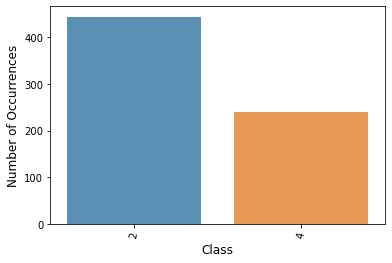

In [37]:
# Retreiving the data of the class to which the data belongs
import seaborn as sns
counts = data1[10].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(counts.index, counts.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.xticks(rotation=80)
plt.show();


<AxesSubplot:>

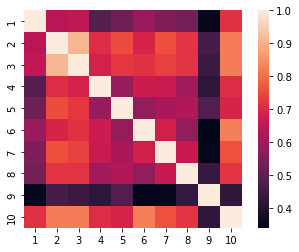

In [38]:
#Heatmap to understand the correlation
data1 = data1[[1,2,3,4,5,6,7,8,9,10]] #Subsetting the data
correlation = data1.corr() #Calculate the correlation of the above variables
sns.heatmap(correlation, square = True) #Plot the correlation as heat map

In [39]:
# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
Y = data1[10]
X = data1.drop(columns=[10])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [40]:
# Performing Logistic Regression
from sklearn.linear_model import LogisticRegression

#defining the model
logreg = LogisticRegression(C=10)

#training the model
logreg.fit(X_train, Y_train)

#predicting the target values
Y_predict1 = logreg.predict(X_test)

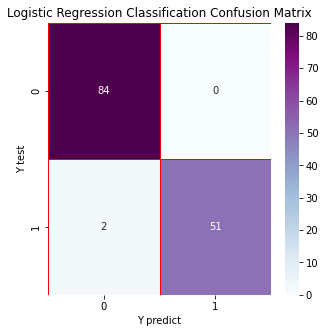

In [41]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [44]:
# Printing the logistic regression Score
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

0.9854014598540146


Supervised Machine Learning performs better for clustering than Kmeans since the model is shown a particular direction

In [59]:
import numpy as np 
from numpy.linalg import inv,pinv
from keras.datasets import mnist
import matplotlib.cm as cm
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import sklearn
from sklearn import linear_model
import spacy 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import sklearn
from numpy import matlib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn import linear_model

## Q2.

In [60]:
class FishersLinearDiscriminant():
    
    def __init__(self, D):
        
        self.D = D # Number of projections
        
        (self.train_X, self.train_y), (self.test_X, self.test_y) = mnist.load_data()

        self.W = None # W 
        self.means, self.covariance, self.prior = None, None, None
     

    def compute(self):

        train_dict, _ =  self.prepare_data_as_dict()

        S_k, S_w = self.within_class_variance()

        S_b = self.Between_class_variance()

        #S_b = np.sum(S_b, axis=0) 

        # S_w_inverse_dot_S_b
        S_w_inverse_dot_S_b = np.dot(pinv(S_w),S_b)

        # Eigen Decomposition of matrix S_w_inverse_dot_S_b
        # Eigen values, Eigen vectors
        eig_val, eig_vec = np.linalg.eig(S_w_inverse_dot_S_b)
        
        # We have to take D′ eigen-vectors that correspond to their largest eigenvalues.
        eigen_values = []
        
        for i in range(len(eig_val)):
            eigen_values.append((eig_val[i],eig_vec[:, i]))
        
        # Reversing the eigen vectors,
        eigen_vectors_decreasing = sorted(eigen_values, key=lambda x:x[0], reverse=True)

        # Take D' eigen vectors
        self.W = np.array([eigen_vectors_decreasing[i][1] for i in range(self.D)])
        
        # Estimate W
        self.W = np.asarray(self.W).T # Take Transpose

        #w = np.asarray(np.array([eigen_vectors_decreasing[i][1] for i in range(self.D)]))
        #self.means, self.covariance, self.priors = self.gaussian(train_dict)
        means, covariance, priors = self.gaussian(train_dict)

        return means, covariance, priors 

    def reshape_data(self, data_dict):
        
        X = []
        y = []

        for y_i, x_i in data_dict.items():
            X.extend(x_i)
            y.extend(x_i.shape[0]*[y_i])
        
        return np.asarray(X), np.asarray(y)


    def compute_accuracy(self, test=False):
        
        #train_dict, test_dict = self.prepare_data_as_dict()
        means, covariance, priors = self.compute()
        if test == True:
            
            _, test_dict  = self.prepare_data_as_dict()

            X, y = self.reshape_data(test_dict) 
            projected_X = np.dot(X, self.W) # X. (W.T)
        
        else:
        
            train_dict, _ = self.prepare_data_as_dict()

            X,y = self.reshape_data(train_dict)
            #print(self.W)
            projected_X = np.dot(X, self.W)
        
        likelihoods = []
        
        digits = sorted(list(means.keys()))

        for x in projected_X:
            r = []
            for d in digits: # Iterate throughout the classes
                # Compute P(C_k/x)
                #print(self.means[d])
                #print(self.covariance[d])
                p_ck = self.gaussian_distribution(x, means[d], covariance[d])
                #print(p_ck)
                p = priors[d] * p_ck
                r.append(p)
            likelihoods.append(r)
        
        likelihood = np.asarray(likelihoods)

        # We estimate probability by assigning the class with the highest likelihood
        preds = np.argmax(likelihoods, axis=1)
        return np.sum(preds == y) / len(y), preds, projected_X

                
    def prepare_data_as_dict(self): # Create dict

        """
        return
        ======        
            Converts train, test from pandas dataframe obj to Dict
            Inspiration drawn from Gaussian distribution function, as it assumed
            X as a dictionary.
        """
        #Y = np.concatenate((self.train_y, self.test_y))
        train_dict = {}
        test_dict = {}

        for x, y in zip(self.train_X, self.train_y):
            if y not in train_dict:
                train_dict[y] = [x.flatten()] # Flattening the array
            else:
                train_dict[y].append(x.flatten()) # Adding data == y to the dict
        for i in np.unique(self.train_y):
            train_dict[i] = np.asarray(train_dict[i])
 
        # repeating the same for the test data

        for x,y in zip(self.test_X, self.test_y):

            if y not in test_dict:
                test_dict[y] = [x.flatten()]
            else:
                test_dict[y].append(x.flatten())
        
        for i in np.unique(self.test_y):
            test_dict[i] = np.asarray(test_dict[i])
        
        
        return train_dict, test_dict 
        


    def mean_vector(self):

        train_dict, test_dict = self.prepare_data_as_dict()
        
        train_mean_vector = {}
        test_mean_vector = {}

        for digit, data in train_dict.items():
            train_mean_vector[digit] = np.mean(data, axis= 0) 

        for digit, data in test_dict.items():
            test_mean_vector[digit] = np.mean(data, axis= 0) 
        
        return train_mean_vector, test_mean_vector
    
    def within_class_variance(self):
        
        train_dict, _ = self.prepare_data_as_dict()
        train_mean, _ = self.mean_vector()

        S_k = []

        for digits, data in train_mean.items():

            x_minus_mk = np.subtract(train_dict[digits], data)

            #a = np.dot(np.transpose(x_minus_mk), x_minus_mk) 
            S_k.append(np.dot(np.transpose(x_minus_mk), x_minus_mk))
            
        S_k = np.asarray(S_k)
        S_w = np.sum(S_k, axis=0)

        return S_k, S_w # Within Class Variance, Total Within Class Variance
  
    def Between_class_variance(self):

        train_dict, _ = self.prepare_data_as_dict() 
        
        global_sum = 0 
        
        N_k = {} # Num of Data points with Class K

        for digits, data in train_dict.items():
            N_k[digits] = data.shape[0]
            global_sum += np.sum(data, axis=0)
        
        self.N = sum(list(N_k.values()))
        
        mu = global_sum/self.N  #Global mean
        #print(mu)
        S_b = []
        
        train_mean, _ = self.mean_vector()

        for digit, means in train_mean.items():
            
            mk__m = means - mu
            #print(mk__m)
            # Element-wise multiplication
            # Outer product  
            S_b.append(np.multiply(N_k[digit], np.outer(mk__m, mk__m.T)))
        S_b = np.sum(S_b, axis=0)#, dtype=object) # For all digits, adding it up.
        
        return S_b
            
  
    def gaussian(self, X): # Assumes X as a dict, so creating a function to convert dataframe to dictionary
        means = {}
        covariance = {}
        priors = {}  # p(Ck)
        for class_id, values in X.items():
            proj = np.dot(values, self.W)
            means[class_id] = np.mean(proj, axis=0)
            covariance[class_id] = np.cov(proj, rowvar=False)
            # estimate the priors using fractions of the training set data points in each of the classes.
            priors[class_id] = values.shape[0] / self.N
        return means, covariance, priors


    def gaussian_distribution(self, x, u, cov):
        scalar = (1. / ((2 * np.pi) ** (x.shape[0] / 2.))) * (1 / np.sqrt(np.linalg.det(cov)))
        x_sub_u = np.subtract(x, u) 
        # Converts train, test from pandas dataframe obj to Dict
        return scalar * np.exp(-np.dot(np.dot(x_sub_u, inv(cov)), x_sub_u.T) / 2.)

In [62]:
fn = FishersLinearDiscriminant(D=2) 
acc1, preds, projected= fn.compute_accuracy(test=True) 
test_acc1 = fn.compute_accuracy(test=True) 
print('Train Acc wth D_dash == 2:', acc1)
print('Test accuracy with D_dash == 2:', test_acc1[0])

Train Acc wth D_dash == 2: 0.565
Test accuracy with D_dash == 2: 0.565


In [63]:
fn = FishersLinearDiscriminant(D=3) 
acc1, preds, projected= fn.compute_accuracy(test=True) 
test_acc1 = fn.compute_accuracy(test=True) 
print('Train Acc wth D_dash == 3:', acc1)
print('Test accuracy with D_dash == 3:', test_acc1[0])

Train Acc wth D_dash == 3: 0.7424
Test accuracy with D_dash == 3: 0.7424


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


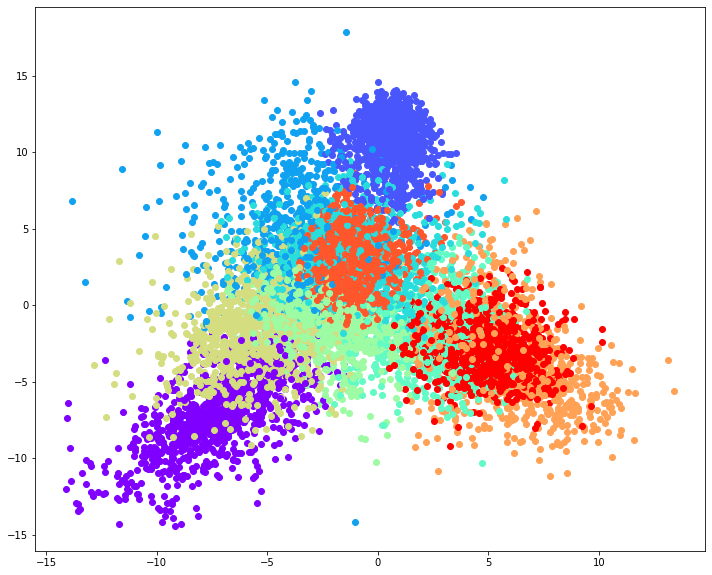

In [7]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
classes = list(np.unique(test_y))
colors = cm.rainbow(np.linspace(0, 1, len(classes)))
plotlabels = {classes[c] : colors[c] for c in range(len(classes))}

plt.figure(figsize=(12,10))
for point,pred in zip(projected,preds):
  plt.scatter(point[0],point[1],color=plotlabels[pred])
plt.show()

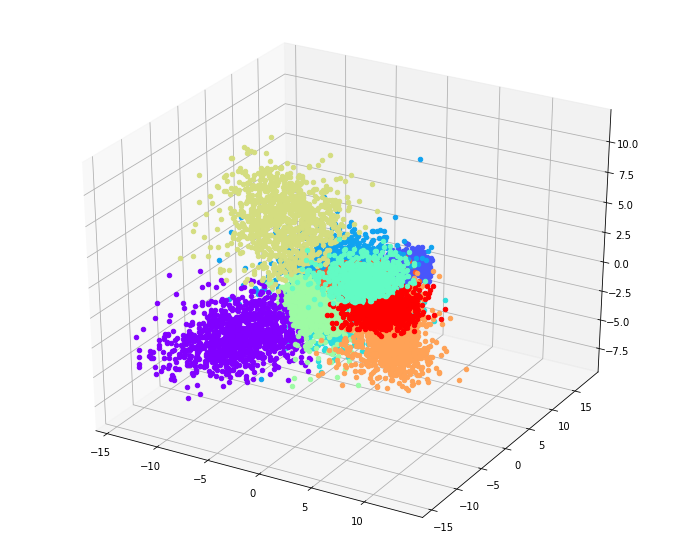

In [13]:
from mpl_toolkits.mplot3d import Axes3D
 
classes = list(np.unique(test_y))
colors = cm.rainbow(np.linspace(0, 1, len(classes)))
plotlabels = {classes[c] : colors[c] for c in range(len(classes))}

fig = plt.figure(figsize=(12,10))
ax =fig.add_subplot(111,projection='3d')
ax.mouse_init()

for point,pred in zip(projected.real,preds):
  ax.scatter(point[0],point[1],point[2],color=plotlabels[pred])

plt.show() 

## Q3

In [64]:
def helper(p,q=None):
    data_shape = p.shape
    if q is not None:
        q_shape = q.shape

        # reshape
        reshape_p = np.sum(p ** 2, axis=1).reshape(-1, 1)
        # reshape
        reshape_q = np.sum(q ** 2, axis=1).reshape(1, -1)

        # repmat
        distance_one = np.dot(p, q.T) * (-2) + matlib.repmat(reshape_p, 1, q_shape[0])
        distance = matlib.repmat(reshape_q, data_shape[0], 1) + distance_one

        return np.sqrt(np.maximum(distance, 0))

    # reshape
    reshape_p = np.sum(p ** 2, axis=1).reshape(-1, 1)

    # transpose
    distance_one = np.dot(p, p.T) * (-2) + matlib.repmat(reshape_p, 1, data_shape[0])

    distance = matlib.repmat(reshape_p.T, data_shape[0], 1) + distance_one

    # filling
    np.fill_diagonal(distance, 0)

    return np.sqrt(np.maximum(distance, 0))

# kernel ridge function
def ridge_func(dist, reg):
    s1 = np.eye(dist.shape[0], dist.shape[1])
    return s1 * reg + dist

def kernel_ridge_model(x, y, kernel_co=0.1, reg=0.01):
    ker_fun = lambda x, z: np.power(1 + (np.power(helper(x, z), 2) / (2 * np.power(kernel_co, 2))), -4)
    pred = np.linalg.solve(ridge_func(ker_fun(x, x), reg), y)

    trace = lambda t1: np.dot(ker_fun(t1, x), pred)
    return trace

In [56]:

class BiasVarianceDecomp:

    def __init__(self, mu1, mu2, sd, n, runs):
        
        self.n = n  
        self.alphas =  np.logspace(-6,0,25,base=2)
        self.mu1 = mu1
        self.mu2 = mu2
        self.sd = sd
        self.runs = runs 
        self.OFFSET = 2
        #self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
    
    def generate_toydata(self):
 
        x = np.random.randn(self.n, self.mu2) 

        x[int(self.n/2):, :] += self.OFFSET  
        
        y = np.ones(self.n)
        y[int(self.n/2):] *= 2 # 1 or 2
        
        permute = np.random.permutation(self.n)
        return x[permute, :], y[permute]
    
    def Z_normal(self, x, mu, sd):
        """
        Returns
        ======
        converts data into standard Normal variable, Z
        sd = 1, z = (x-mu)
        """
        return np.exp(-0.5 * np.power((x - mu) / sd, 2)) / (np.sqrt(2 * np.pi) * sd)

     
    def model(self):

        models = {} 
         
        for i in range(len(self.alphas)):
            models[i] = linear_model.Ridge(alpha=self.alphas[i])
        
        return models

    def computeybar(self,X):
        
        noise = []
        models = self.model()

        #for i in range(len(self.alphas)):

        p_x_given_y1 = self.Z_normal(X, self.mu1,self.sd)
        p_xbar_given_y1 = p_x_given_y1[:,0] * p_x_given_y1[:,1]

        p_x_given_y2 = self.Z_normal(X,self.OFFSET,self.sd)
        p_xbar_given_y2 = p_x_given_y2[:,0] * p_x_given_y2[:,1]

        p_xbar = (p_xbar_given_y1 + p_xbar_given_y2) * 0.5 # (y1 + y2)/2.

        p_y1_given_xbar = (0.5 * p_xbar_given_y1)/p_xbar # Conditional Probability

        p_y2_given_xbar = (0.5 * p_xbar_given_y2)/p_xbar

        #Ey = summation(n_i,x_i)
        
        return 1 * p_y1_given_xbar + 2 * p_y2_given_xbar # class_i * prob_distribution

         

    def computemse(self, model, runs):
         
        error = []
        for i in range(self.runs):

            X, y = self.generate_toydata()   
            X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)
            
            #reg = model.fit(X_train, y_train)
            preds = model(X_test)  

            error.append(np.mean(sklearn.metrics.mean_squared_error(y_pred=preds,y_true=y_test)))

            #error.append(np.sum(e)/self.runs)
            #print(classifier.predict(X_test))
            #print(e)
        # Plot the errors over alphas
        #plt.plot(self.alphas, error)
        return np.sum(error)/self.runs #scores

    def plot_data(self, X, y):
        pass

    def computehbar(self, model):
        
        #bias = []
        hbar = []
        #ybar = self.computeybar()

        #models = self.model()
        k = 0
        for i in range(self.runs):
            
        #    b = []
        #    h = []
        #    y_bar = ybar[k]
        #    for i in range(self.runs):

            X, y = self.generate_toydata()   
            X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)
    
            #reg = model.fit(X_train, y_train)
            preds = model(X_test)

            hbar.append(np.mean(preds))
            

            #print(classifier.predict(X_test))
        
        Hbar = np.sum(hbar)/self.runs 
        #plt.plot(self.alphas, bias)
        return Hbar  


    def computevariance(self, hbar, model):
        
        #models = self.model()
         
        var = []  
        for i in range(self.runs):
            
        #    b = []
        #    h = []
        #    y_bar = ybar[k]
        #    for i in range(self.runs):

        #        toy = self.generate_toydata()  
            X, y = self.generate_toydata()   
            X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)
   
             
            #reg = model.fit(X_train, y_train)
            preds = model(X_test)  

            var.append((preds-hbar)**2)
             
            #print(classifier.predict(X_test))
            
        # Plot the errors over alphas
        #plt.plot(self.alphas, var)
        return np.mean(var)/self.runs  

    def biasvariancedemo(self):
 
        
        var = []
        bias = []
        error= []
        total = []
        noise = []

        models = self.model()
        
        X, y = self.generate_toydata()

        models = {}

        for i in range(len(self.alphas)):
            models[i] = kernel_ridge_model(X, y, kernel_co=0.2, reg=self.alphas[i])
        for keys, values in models.items():
            
            e = self.computemse(values, self.runs)
            y_bar = self.computeybar(X)
            n = np.mean(y-y_bar)**2
            
            hbar =self.computehbar(model=values)
            b = np.mean((np.mean(hbar)-y_bar)**2)

            v = self.computevariance(model=values,hbar=hbar)

            bias.append(b)
            var.append(v)
            noise.append(n)
            error.append(e)
            total.append((b + v + n))
 
        res = pd.DataFrame({
            'Test Error': error,
            'Noise' : noise,
            'Bias^2': bias,
            'Variance': var,
            'final_sum': total,
            'Regularization': np.log2(self.alphas)
        })

        plt.figure(figsize=(10,10))
        plt.plot(res['Regularization'],res['final_sum'],color='blue', label="$bias(x) + var(x) + noise$")
        plt.plot(res['Regularization'],res['Test Error'],color='pink', label="$error$")
        plt.plot(res['Regularization'],res['Bias^2'],color= 'red', label="$bias(x)$")
        plt.plot(res['Regularization'],res['Variance'],color= 'orange', label="$var(x)$")
        plt.plot(res['Regularization'],res['Noise'], color='black', label="$noise$")

        plt.legend()
        plt.show()

        #return bias, var, total, error, noise
            

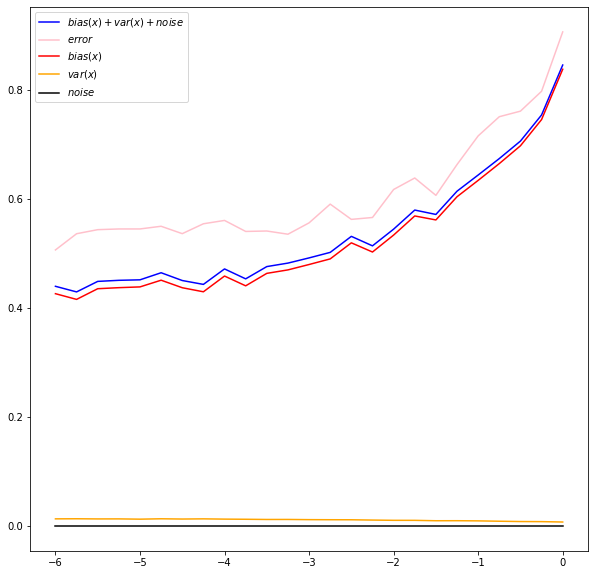

In [57]:
fn = BiasVarianceDecomp(mu1=0,mu2=2,n=500,runs=25,sd=1)
#bias, var, total, error, noise = fn.biasvariancedemo()
fn.biasvariancedemo()